In [1]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from twitter_config import consumer_key, consumer_key_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
analyzer = SentimentIntensityAnalyzer()

target_user = ['@BBC', '@CBS', '@Fox', '@CNN', '@nytimes']

sentiments = []

for x in range(5):
    
    for target in target_user:
        public_tweets = api.user_timeline(target)
        
        for tweet in public_tweets:
            
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            sentiments.append({"Date": tweet["created_at"],
                              "Screen_Name": tweet['user']['screen_name'],
                              "Compound": compound,
                              "Positive": pos,
                              "Negative": neg,
                              "Neutral": neu})

In [4]:
df_twitter = pd.DataFrame(sentiments)

df_twitter.head()

,Compound,Date,Negative,Neutral,Positive,Screen_Name
0,0.4019,Sun Jul 08 21:07:05 +0000 2018,0.000,0.787,0.213,BBC
1,-0.6908,Sun Jul 08 20:52:12 +0000 2018,0.207,0.793,0.000,BBC
2,0.0000,Sun Jul 08 20:05:00 +0000 2018,0.000,1.000,0.000,BBC
3,0.0000,Sun Jul 08 19:04:02 +0000 2018,0.000,1.000,0.000,BBC
4,-0.6908,Sun Jul 08 18:04:02 +0000 2018,0.439,0.561,0.000,BBC


In [5]:
df_twitter.to_csv('Sentiment_analysis_Twitter.csv', index=False)

In [6]:
BBC = df_twitter[df_twitter['Screen_Name'] == 'BBC']
CBS = df_twitter[df_twitter['Screen_Name'] == 'CBS']
Fox = df_twitter[df_twitter['Screen_Name'] == 'Fox']
CNN = df_twitter[df_twitter['Screen_Name'] == 'CNN']
NYT = df_twitter[df_twitter['Screen_Name'] == 'nytimes']

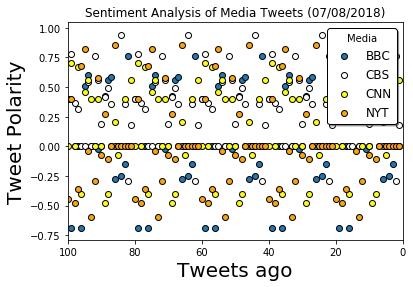

In [16]:
x_values = np.arange(1,BBC.shape[0]+1)

plt.scatter(x_values[::-1], BBC['Compound'], edgecolors='black',label='BBC')

plt.scatter(x_values[::-1], CBS['Compound'], edgecolors='black', color='white',label='CBS')
plt.scatter(x_values[::-1], CNN['Compound'], edgecolors='black', color='yellow',label='CNN')
plt.scatter(x_values[::-1], NYT['Compound'], edgecolors='black', color='orange',label='NYT')


plt.legend(frameon=True, shadow= True, edgecolor='black', fontsize = 'large', title='Media')
plt.xlim(0,100)
plt.xlabel('Tweets ago', fontsize='20')
plt.ylabel('Tweet Polarity', fontsize='20')

now = datetime.now()
now = now.strftime('%m/%d/%Y')
plt.title('Sentiment Analysis of Media Tweets ({})'.format(now,fontsize=(20)))

plt.xlim(100,0);

In [18]:
df_twitter_avg_compound = df_twitter.groupby(['Screen_Name'])["Compound"].mean().reset_index()

df_twitter_avg_compound.rename_axis({'Screen_Name': 'Media Sources',
                                    'Compound': 'Avg. Compound'}, axis=1, inplace=True)

df_twitter_avg_compound.style.bar(subset=['Avg. Compound'], align='mid', color=['blue', 'red'])

C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  after removing the cwd from sys.path.


,Media Sources,Avg. Compound
0,BBC,0.0879
1,CBS,0.31751
2,CNN,0.149735
3,fox,0.242995
4,nytimes,0.060095


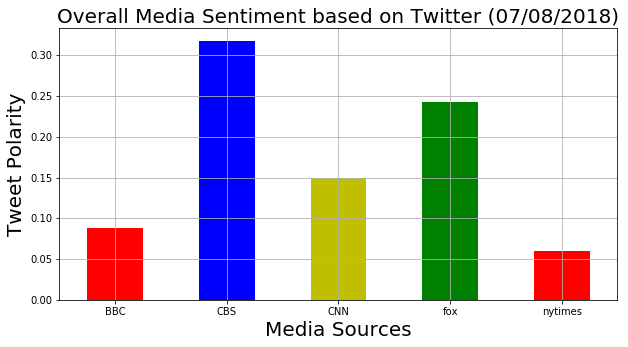

In [21]:
plt.figure(figsize=(10,5))
df_twitter.groupby(["Screen_Name"])["Compound"].mean().plot(kind='bar',color=['r','b','y','g'])

plt.ylabel('Tweet Polarity', fontsize='20')
plt.xlabel('Media Sources', fontsize='20')
plt.xticks(rotation=0)
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title('Overall Media Sentiment based on Twitter ({})'.format(now),fontsize=(20));
plt.grid()